<p5>REGRESION LINEAL<p5>


Metodo estadístico que modela meidante una ecuacion lineal el modelado de datos en donde se debe tener una varialbe independiente y una o mas dependientes de acuerdo con cada modelo. Se llama regresion lineal cuando hay solo una variable independiente y regresión multiple cuando hay mas de una.

**Modelos re regresión lineal en Python**

Los principales son Scikit-learn y Statsmodels, el modelo Scikit-learn esta orientada principalmente a la predicción.


<p5>Definición matemática:<p5>

Se busca una media μ, en donde tiene una variable respuesta independiente 'y' y se relaciona de manera lineal con la o las variables x1
...  xp de acuerde a la ecuación:


<p8>                               yi=β0+β1xi1+β2xi2+...+βpxip+ϵi   <p8>


  

β0
 : es la ordenada en el origen, se corresponde con el valor promedio de la variable respuesta  y
  cuando todos los predictores son cero.

βj
 : es el efecto promedio que tiene sobre la variable respuesta el incremento en una unidad de la variable predictora  xj
 , manteniéndose constantes el resto de variables. Se conocen como coeficientes parciales de regresión.

e
 : es el residuo o error, la diferencia entre el valor observado y el estimado por el modelo. Recoge el efecto de todas aquellas variables que influyen en  y
  pero que no se incluyen en el modelo como predictores.

  <center><img src="ejemplo1.png" ><center>
 <center> ejemplo 01 <center>
  

Bondad de ajuste del modelo 
Esto es necesario ya que se debe ajustar las observaciones de entre todas las posibilidades, ya que puede llegar a tener un gran error. 


Error estándar de los residuos (Residual Standar Error, RSE)

<center> <img src="formula.png"> <center>

<p5>RSE: <p5> Es el Error Estándar Residual, que indica cuánto se desvían, en promedio, las observaciones reales de los valores predichos por el modelo de regresión.


<p5>RSS: <p5> Es la Suma de los Cuadrados de los Residuales, que mide el error total en la predicción.

<p5>n:<p5> Es el número total de observaciones en el conjunto de datos.

<p5>p:<p5> Es el número de predictores o variables independientes en el modelo.


El denominador 𝑛−𝑝−1 representa los grados de libertad en el modelo de regresión. La razón de dividir el RSS por este término y luego tomar la raíz cuadrada es para obtener una medida de dispersión comparable con la desviación estándar.

En términos prácticos, un RSE más bajo indica que el modelo tiene mejores ajustes a los datos, mientras que un RSE más alto sugiere que las predicciones tienen mayor variabilidad y el modelo podría no ser tan preciso.

Resumen sobre el coeficiente de determinación R**2:
El coeficiente de determinación (𝑅**2) mide qué proporción de la variabilidad de la variable respuesta es explicada por el modelo, comparada con la variabilidad total. Su valor oscila entre 0 y 1, siendo más fácil de interpretar que el RSE por ser adimensional.

Se calcula como:
<center> <img src="Formula02.png"> <center>

En regresión lineal simple, 𝑅**2 es el cuadrado del coeficiente de correlación de Pearson (r), pero esto no se cumple en regresión múltiple.

En modelos de regresión múltiple, R**2 tiende a aumentar al agregar más predictores, aunque no siempre mejora la calidad del modelo. Por ello, no es adecuado para comparar modelos con diferente número de predictores.



El R* * 2 ajustado corrige este problema penalizando el valor de R * *2 según el número de predictores y el tamaño de la muestra. Esto ayuda a identificar el modelo más eficiente, es decir, aquel que explica mejor la variabilidad con menos predictores innecesarios.

Significancia del modelo F-test
Evalúa si el modelo es útil para predecir la variable respuesta. Se compara la suma de cuadrados totales (TSS) con la suma de cuadrados residuales (RSS):


<center> <img src="Formula03.png"> <center>




𝑇𝑆𝑆(Suma de Cuadrados Totales): Mide la variabilidad total de los datos sin considerar el modelo de regresión, es decir, la suma de los cuadrados de las diferencias entre los valores observados (𝑦𝑖) y la media de la variable respuesta (𝑦 )

- Hipótesis nula (𝐻0): Ningún predictor contribuye al modelo.

- Hipótesis alternativa (𝐻𝑎): Al menos un predictor es significativo.

Un **𝐹** significativo indica que el modelo tiene valor predictivo, pero no garantiza que todos los predictores sean necesarios.

Incertidumbre en la predicción
Existen dos formas de medir la incertidumbre:

Intervalos de confianza: Estiman el valor promedio esperado de 𝑦 para un 𝑥 dado.
Intervalos de predicción: Estiman un valor individual de 𝑦 para un 𝑥 dado y son más amplios que los intervalos de confianza.
Ambos intervalos se ensanchan cerca de los extremos del rango observado.

In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm

# Configuración matplotlib
# ==============================================================================
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 10, 'lines.linewidth': 1.5})

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

In [5]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


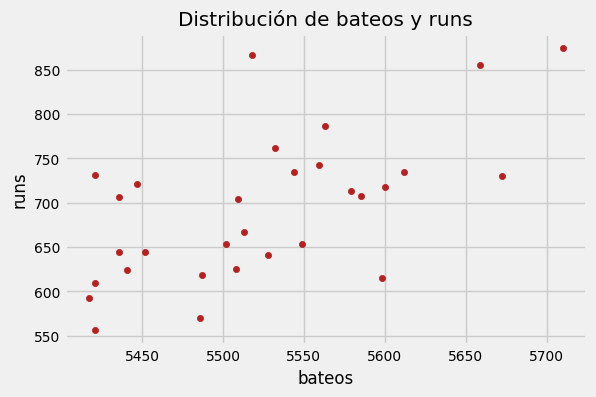

In [7]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

In [9]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")

Coeficiente de correlación de Pearson: 0.6106270467206688
P-value: 0.0003388351359791975


In [11]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [13]:
# Información del modelo
# ==============================================================================
print(f"Intercept: {modelo.intercept_}")
print(f"Coeficiente: {list(zip(modelo.feature_names_in_, modelo.coef_))}")
print(f"Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: -2367.702841302211
Coeficiente: [('bateos', np.float64(0.5528713534479736))]
Coeficiente de determinación R^2: 0.3586119899498744


In [15]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"Primeras cinco predicciones: {predicciones[0:5]}")
print(f"El error (rmse) de test es: {rmse}")

Primeras cinco predicciones: [643.78742093 720.0836677  690.78148597 789.19258689 627.20128033]
El error (rmse) de test es: 59.336716083360486


In [17]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [19]:
# Creación del modelo utilizando matrices como en scikit-learn
# ==============================================================================
# A la matriz de predictores se le añade una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Wed, 26 Feb 2025   Prob (F-statistic):            0.00906
Time:                        23:39:46   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

In [21]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-4579.192050,-156.213633
bateos,0.152244,0.953499


In [23]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog=X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
3,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
23,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
14,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
13,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


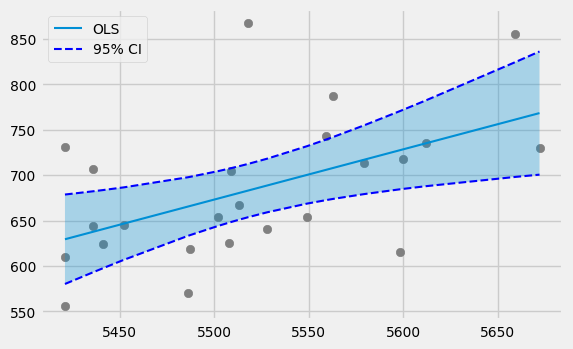

In [25]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog=X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train.loc[:, 'bateos']
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='blue', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='blue')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.3)
ax.legend();

In [27]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 59.33671608336119


In [28]:
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Wed, 26 Feb 2025   Prob (F-statistic):            0.00906
Time:                        23:40:34   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0